# Imports

In [28]:
import os
import pandas as pd
import numpy as np
import glob
import cv2
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications import ResNet50
from tensorflow.keras.applications import VGG16 ,InceptionV3
from keras import models
from keras import layers


# Read data

In [4]:
df = pd.read_csv("/kaggle/input/english-handwritten-characters-dataset/english.csv")
df.head(5)

,image,label
0,Img/img001-001.png,0
1,Img/img001-002.png,0
2,Img/img001-003.png,0
3,Img/img001-004.png,0
4,Img/img001-005.png,0


In [9]:
df.shape

(3410, 2)

In [8]:
imgs=glob.glob('/kaggle/input/english-handwritten-characters-dataset/Img/*')
#/kaggle/input/english-handwritten-characters-dataset/Img/img040-022.png
len(imgs)

3410

Shape of the original image: (900, 1200, 3)


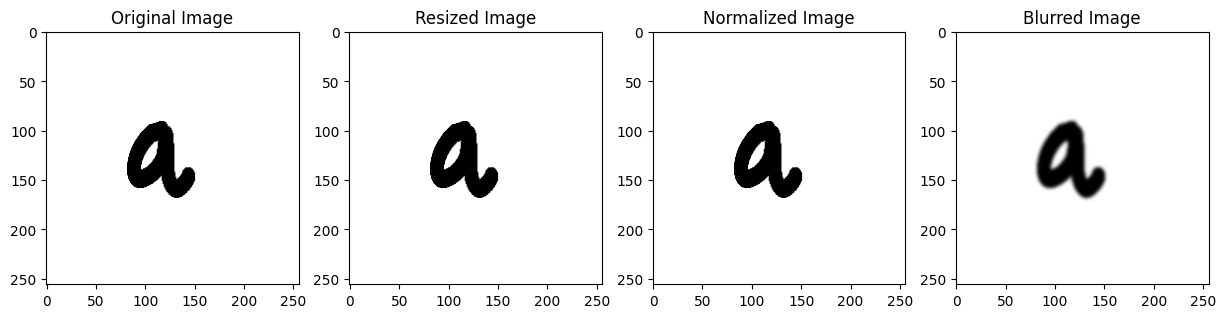

In [61]:
import cv2
import matplotlib.pyplot as plt

# Read the original image
original_img = cv2.imread(imgs[84])

# Print the shape of the original image
print(f"Shape of the original image: {original_img.shape}")

# Resize the original image to a larger size
original_img_resized = cv2.resize(original_img, (256, 256))

# Convert color space from BGR to RGB
original_img_resized_rgb = cv2.cvtColor(original_img_resized, cv2.COLOR_BGR2RGB)

# Normalize pixel values to the range [0, 1]
original_img_resized_normalized = original_img_resized_rgb / 255.0

# Apply Gaussian blur with larger kernel size and sigma
blurred_img = cv2.GaussianBlur(original_img_resized_normalized, (9, 9), 0)

# Plotting
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(original_img_resized_rgb)
plt.axis('on')

# Plot resized image
plt.subplot(1, 4, 2)
plt.title('Resized Image')
plt.imshow(original_img_resized_rgb)
plt.axis('on')

# Plot normalized image
plt.subplot(1, 4, 3)
plt.title('Normalized Image')
plt.imshow(original_img_resized_normalized)
plt.axis('on')

# Plot blurred image
plt.subplot(1, 4, 4)
plt.title('Blurred Image')
plt.imshow(blurred_img)
plt.axis('on')

plt.show()


# Data Preprocessing

In [10]:
data = []
labels = []
for i in imgs: #/kaggle/input/english-handwritten-characters-dataset/Img/img040-022.png
    index = df.loc[df['image'] == i[53:]].index[0]
    label = df.iloc[index, 1]
    data.append(i)
    labels.append(label)

In [13]:
new_data = []
for i in imgs:
    img = cv2.imread(i)
    img = cv2.resize(img, (256, 256))
    img = np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = img / 255.0  
    img = cv2.GaussianBlur(img, (9, 9), 0)  
    new_data.append(img)
    
new_data = np.array(new_data)
    

In [14]:
labels=np.array(labels)
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

# Split the data

In [15]:
train_images,test_images,train_labels,test_labels = train_test_split(new_data,labels,test_size=0.2,random_state=42)


In [16]:
train_images.shape

(2728, 256, 256, 3)

In [40]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze the base model

# Create a Sequential model
model = models.Sequential()

# Add layers to the Sequential model
model.add(base_model)
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.GlobalAveragePooling2D())  
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(62, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.0856 - loss: 3.8241

W0000 00:00:1712188678.122226      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 221ms/step - accuracy: 0.0868 - loss: 3.8168 - val_accuracy: 0.4150 - val_loss: 1.9209
Epoch 2/20


W0000 00:00:1712188683.881238      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - accuracy: 0.5284 - loss: 1.5237 - val_accuracy: 0.6085 - val_loss: 1.2737
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.7082 - loss: 0.8745 - val_accuracy: 0.7522 - val_loss: 0.8027
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 187ms/step - accuracy: 0.8292 - loss: 0.5561 - val_accuracy: 0.7786 - val_loss: 0.6843
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.8496 - loss: 0.4764 - val_accuracy: 0.7815 - val_loss: 0.6483
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - accuracy: 0.8654 - loss: 0.4089 - val_accuracy: 0.8123 - val_loss: 0.5631
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 194ms/step - accuracy: 0.8870 - loss: 0.3157 - val_accuracy: 0.8255 - val_loss: 0.4898
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 191ms/step - accuracy: 0.9119 - loss: 0.2491 - val_accuracy: 0.8431 - val_loss: 0.4924
Epoch 9/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.9244 - loss: 0.2227 - val_accuracy: 0.825

# evaluation

In [41]:
model.evaluate(test_images,test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - accuracy: 0.8414 - loss: 0.6967


[0.5954961180686951, 0.8489736318588257]

In [42]:
y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)
# Calculate evaluation
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 168ms/step
Accuracy: 0.8489736070381232
Precision: 0.8763342708470342
Recall: 0.8489736070381232
F1 Score: 0.8491848477471551


W0000 00:00:1712189005.983829      85 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


# Test

In [45]:
predicted_labels = Encoder.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = Encoder.inverse_transform(test_labels)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step


printed label : Z
actual label : Z


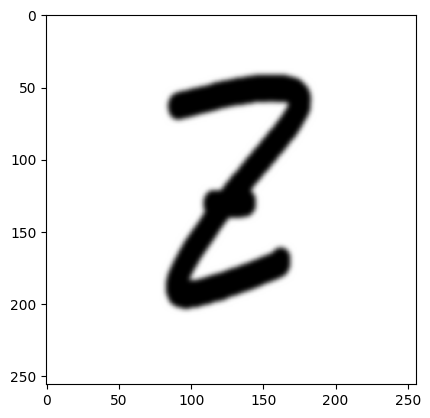

In [55]:
#180  #74  #397
i=96
plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])